**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from types import SimpleNamespace
from scipy import optimize
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-whitegrid')

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [3]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [5]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [8]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
########## Question 2 final #######


par = SimpleNamespace()
par.sigma_epsilon = 0.1
par.kappa_init = 1
par.eta = 0.5
par.w = 1.0
par.rho = 0.9
par.iota = 0.01
par.r = 0.01
par.T = 120
par.delta = 0.00
par.K = 100


from Q2 import *
#K = 10
H, H_cum = calculate_H(par)
#print(H)
#plt.plot(H_cum)
#plt.show()


#optimal_delta(par)

"""


max_index = np.argmax(H_values)
max_delta = delta_values[max_index]
max_h = H_values[max_index]

# Plot delta against h
plt.plot(delta_values, H_values)
plt.scatter(max_delta, max_h, color='red', label=f'Max h = {max_h:.3f}')
plt.axvline(x=max_delta, color='red', linestyle='--', label=f'Delta = {max_delta:.3f}')
plt.xlabel('$\Delta$')
plt.ylabel('h')
plt.title('Ex post value of salon, h($\epsilon_0,\epsilon_1,...,\epsilon_{119}$), given values of $\Delta$')
plt.grid(True)
plt.legend()
plt.show()
"""

H is = 162.64105163839386 for K = 100


"\n\n\nmax_index = np.argmax(H_values)\nmax_delta = delta_values[max_index]\nmax_h = H_values[max_index]\n\n# Plot delta against h\nplt.plot(delta_values, H_values)\nplt.scatter(max_delta, max_h, color='red', label=f'Max h = {max_h:.3f}')\nplt.axvline(x=max_delta, color='red', linestyle='--', label=f'Delta = {max_delta:.3f}')\nplt.xlabel('$\\Delta$')\nplt.ylabel('h')\nplt.title('Ex post value of salon, h($\\epsilon_0,\\epsilon_1,...,\\epsilon_{119}$), given values of $\\Delta$')\nplt.grid(True)\nplt.legend()\nplt.show()\n"

In [10]:
"""# write your code here 

import numpy as np

# fra hjaltes
def profit_func(l, kappa, eta=0.5, w=1.0):
    return kappa * l**(1 - eta) - w * l


eta = 0.5
w = 1.0
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1+0.01)**(1/12)
kappa_init = 1
T = 120

#draw epsilons
#np.random.seed(1998)
#epsilons = np.random.normal((0.5*sigma_epsilon**2), sigma_epsilon, (120,1))
#epsilon_list = epsilons.tolist()


def kappas(kappa_init):

    #draw epsilons
    np.random.seed(1998)
    epsilons = np.random.normal((0.5*sigma_epsilon**2), sigma_epsilon, (120,1))
    epsilon_list = epsilons.tolist()

    # Initialize the list with an empty array
    log_kappas = np.zeros((len(epsilons),)) 

    for i,epsilon in enumerate(epsilons):
        
        if i==0: 
            log_kappa_t = np.log(kappa_init) + epsilon
        else:
            # Calculate the autoregressive value at time t
            log_kappa_t = log_kappas[i-1] + epsilon

        # add log_kappa_t to the list of log_kappas
        log_kappas[i] = log_kappa_t

        # convert to the exponential values of log_kappa to get the kappa values
        kappas = np.exp(log_kappas)

    return kappas

kappa_values2 = kappas(kappa_init)
print(kappas)"""



'# write your code here \n\nimport numpy as np\n\n# fra hjaltes\ndef profit_func(l, kappa, eta=0.5, w=1.0):\n    return kappa * l**(1 - eta) - w * l\n\n\neta = 0.5\nw = 1.0\nrho = 0.9\niota = 0.01\nsigma_epsilon = 0.1\nR = (1+0.01)**(1/12)\nkappa_init = 1\nT = 120\n\n#draw epsilons\n#np.random.seed(1998)\n#epsilons = np.random.normal((0.5*sigma_epsilon**2), sigma_epsilon, (120,1))\n#epsilon_list = epsilons.tolist()\n\n\ndef kappas(kappa_init):\n\n    #draw epsilons\n    np.random.seed(1998)\n    epsilons = np.random.normal((0.5*sigma_epsilon**2), sigma_epsilon, (120,1))\n    epsilon_list = epsilons.tolist()\n\n    # Initialize the list with an empty array\n    log_kappas = np.zeros((len(epsilons),)) \n\n    for i,epsilon in enumerate(epsilons):\n        \n        if i==0: \n            log_kappa_t = np.log(kappa_init) + epsilon\n        else:\n            # Calculate the autoregressive value at time t\n            log_kappa_t = log_kappas[i-1] + epsilon\n\n        # add log_kappa_t to 

In [11]:
# create lists for t, l and kappa values
t_values = list(range(120))
l_values = []
k_values = kappa_values2.tolist()

# calculate l values for each kappa
for kappa in kappa_values2:
    l = (((1-eta) * kappa) / w) ** (1 / eta)
    l_values.append(l)
print(l_values)
#print(len(t_values))
#print(len(l_values))
#print(len(k_values))


# initialise h values and define l in t-1
h_value = 0
l_previous = 0
for t, kappa, l in zip(t_values, k_values, l_values):
    lt = l
    indicator = 1 if lt != l_previous else 0
    h_value += R ** (-t) * (kappa * lt**(1 - eta) - w * lt - indicator * iota)
    l_previous = lt

    #print(lt, l_previous, indicator, h_value)

    #return h_value
print(h_value)

NameError: name 'kappa_values2' is not defined

In [ ]:
from Q2 import *
K = range(100)
h_test2 = calculate_H(K)
#print(h_test2)
plt.plot(h_test2)
plt.show()

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We begin by defining $chi^k$ and $x^{k0}$ as functions of the parameters. For the optimizer, we draw the $x$ values and loop over the list, using the $chi^k$ and $x^{k0}$ functions to determeine when to use the refined omtimization process. At last, we save the values to print and plot them. We plot both x values in the same plot with the f value on the y-axis. 

   0: x0 = (-213.61, 468.51) -> x0_k = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   1: x0 = ( 105.66,-448.08) -> x0_k = ( 105.66,-448.08) -> converged at ( 103.62,-448.27) with f =  52.97477721
   2: x0 = (-430.39, -38.53) -> x0_k = (-430.39, -38.53) -> converged at (-430.18, -39.95) with f =  46.68672712
   3: x0 = (-573.49, 272.73) -> x0_k = (-573.49, 272.73) -> converged at (-574.61, 270.73) with f = 100.93237534
   4: x0 = (  29.26,  53.92) -> x0_k = (  29.26,  53.92) -> converged at (  31.40,  53.26) with f =   0.95651824
   5: x0 = ( -52.35,   1.66) -> x0_k = ( -52.35,   1.66) -> converged at ( -50.24,  -0.00) with f =   0.63133900
   6: x0 = (-126.64,-418.59) -> x0_k = (-126.64,-418.59) -> converged at (-125.60,-417.21) with f =  47.50580373
   7: x0 = (-166.95,-405.51) -> x0_k = (-166.95,-405.51) -> converged at (-166.42,-403.89) with f =  47.75130112
   8: x0 = (-194.45,-383.61) -> x0_k = (-194.45,-383.61) -> converged at (-194.68,-381.70) with 

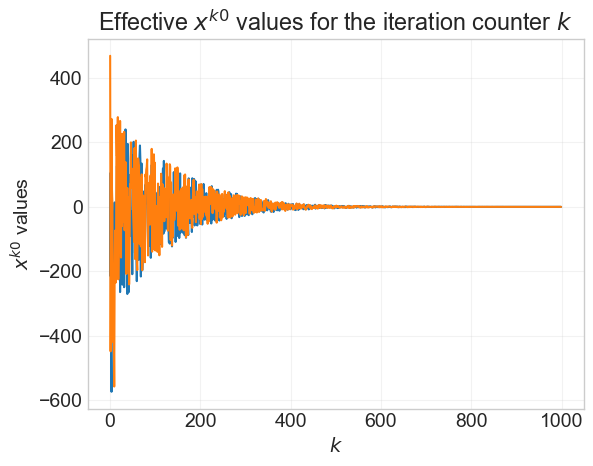

In [16]:
# Import all functions from the py file
from Q3 import *

# Call the optimizer with both print and plot pre-set to True
optimizer()

The optimizer is able to find the global minimum after only 351 iterations. In the plot, it is clear that it converges towards the omtimum, as the $chi^k$ weight pulls the randomly drawn x-value closer and closer to the last found optimum. 

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

For Question 2, we call the optimizer with the new $\underline{K}$ value and get the optimum after 352 iterations, which is 1 more than before. 

We tried with different seeds to see if we were just lucky, but generally the difference is not very big. 

The convergence is a bit slower using a higher $\underline{K}$, as more iterations try to "brute force" the solution. Still, the optimizer might stumble on a very low function value within one of the first 100 $\underline{K}$ iterations and have a better value to converge towards, once the x values start being weighted. Therefore, it doesn't make much of the difference whether $\underline{K}$ = 10 or $\underline{K}$ = 100. 

   0: x0 = (-213.61, 468.51) -> x0_k = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   1: x0 = ( 105.66,-448.08) -> x0_k = ( 105.66,-448.08) -> converged at ( 103.62,-448.27) with f =  52.97477721
   2: x0 = (-430.39, -38.53) -> x0_k = (-430.39, -38.53) -> converged at (-430.18, -39.95) with f =  46.68672712
   3: x0 = (-573.49, 272.73) -> x0_k = (-573.49, 272.73) -> converged at (-574.61, 270.73) with f = 100.93237534
   4: x0 = (  29.26,  53.92) -> x0_k = (  29.26,  53.92) -> converged at (  31.40,  53.26) with f =   0.95651824
   5: x0 = ( -52.35,   1.66) -> x0_k = ( -52.35,   1.66) -> converged at ( -50.24,  -0.00) with f =   0.63133900
   6: x0 = (-126.64,-418.59) -> x0_k = (-126.64,-418.59) -> converged at (-125.60,-417.21) with f =  47.50580373
   7: x0 = (-166.95,-405.51) -> x0_k = (-166.95,-405.51) -> converged at (-166.42,-403.89) with f =  47.75130112
   8: x0 = (-194.45,-383.61) -> x0_k = (-194.45,-383.61) -> converged at (-194.68,-381.70) with 

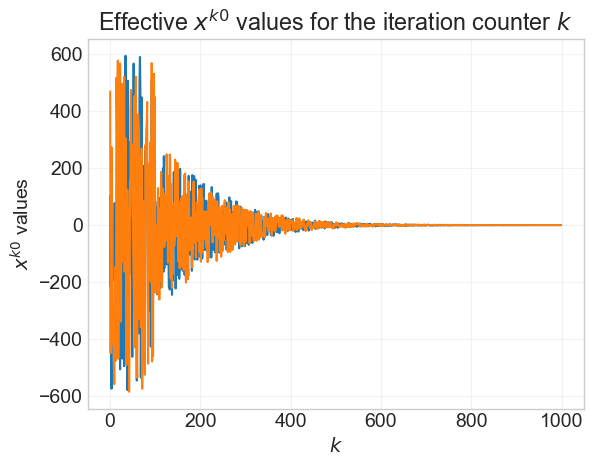

In [15]:
# Calling the optimizer again using a higher K
optimizer(K_=100)

The plot shows the same 1.000 $x$ values. The plot does not converge in the beginning due to the new $\underline{K}$. After $\underline{K}$ it converges just the same though if not a little bit slower.